<a href="https://colab.research.google.com/github/lonen8188/PythonAI/blob/3-1.K-NeighborsRegression/hg_03_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 58 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

기초자료


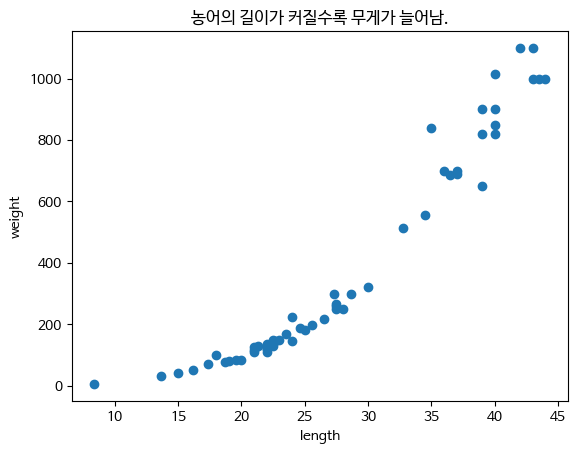

(4,)


In [ ]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') # 한글처리

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
print('기초자료')
plt.title('농어의 길이가 커질수록 무게가 늘어남.')
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
# 사이킷 런의 trian_test_split 함수를 사용해 훈련세트와 테스트 세트로 나눔
# random_state=42 서로 같은 테스트를 위해 시드값 제공

# 사이킷 런에 사용할 훈련 세트는 2차원 배열을 사용함
# perch_length가 1차원 배열이기 때문에 이를나눈 train_input과 test_input도 1차원 배열임
# [3,] -> [3,1] 2차원 배열을 사용해야 함으로 억지로 변환 reshape() 메서드 활용 (4,) -> (2,2)

test_array = np.array([1,2,3,4])
print(test_array.shape)


(4,)


In [ ]:
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


In [ ]:
# 아래 코드의 주석을 제거하고 실행하면 에러가 발생합니다
# test_array = test_array.reshape(2, 3)

In [ ]:
train_input = train_input.reshape(-1, 1) # -1 지정하면 원소 개수로 모두채우라는 의미 , 1은 두번 째 크기를 1로
test_input = test_input.reshape(-1, 1)

In [ ]:
print(train_input.shape, test_input.shape) # -1을 사용하면 매번 원소의 크기를 외우지 않아도 됨

(42, 1) (14, 1)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor # 회귀 알고리즘용 구현 클래스
knr = KNeighborsRegressor()
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [ ]:
knr.score(test_input, test_target) # 분류의 경우는 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율(정확도) -> 예측값

0.992809406101064

In [ ]:
# 회귀인 경우에는 평가를 결정 계수라고 함.R^2
# R^2 = 1 = ((타깃 - 예측)^2의 합) /((타킷 - 평균)^2의 합) 임
# 타깃의 평균 정도를 예측하는 수준 -> R2는 0에 가까워지고, 예측이 타깃에 가까워지면 1에 가까운 값
from sklearn.metrics import mean_absolute_error
# sklearn.metrics 패키지 아래 여러가지 측정도구를 제공함.
# mean_absolute_error절대값 오차를 평균하여 반환

# 테스트 세트에 대한 예측(prediction)을 만듭니다
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, test_prediction)
print(mae)
# 19g 정도 타깃값과 다르다

19.157142857142862


In [ ]:
# 과대 적합 VS 과소 적합
print(knr.score(train_input, train_target))

# 과대 적합 : 훈련 세트에서 점수가 좋았는데 테스트 세트에서 점수가 굉장히 나쁨
# 과소 적합 : 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 낮은 경우

0.9698823289099254


In [ ]:
# 사이킷 런의 k-최근접이웃 기본값이 5인데 이것을 3으로 변경
# 이웃의 갯수를 3으로 설정합니다
knr.n_neighbors = 3
# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [ ]:
print(knr.score(test_input, test_target)) # 이웃 개수 조정으로 과대,과소 적합 해결

0.9746459963987609


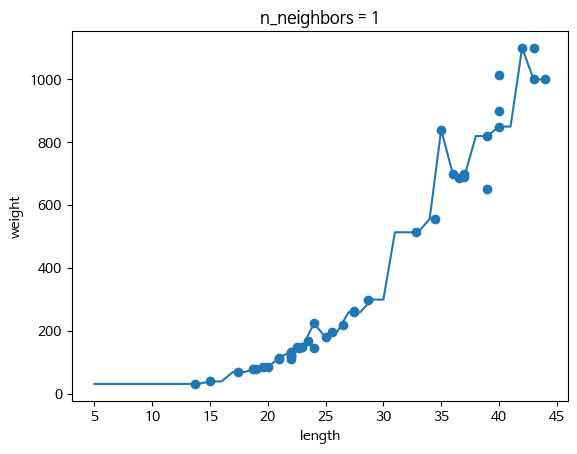

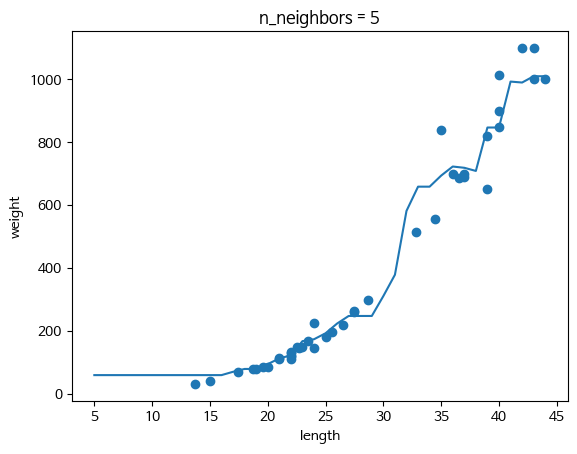

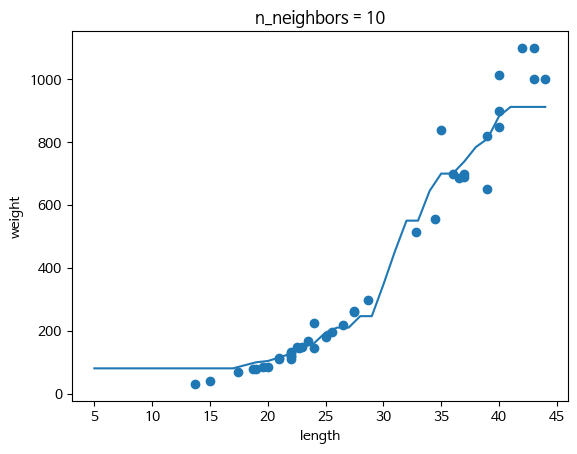

In [ ]:
# 회귀 문제 해결 -> knr.n_neighbors = 3

# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()